**Importing  the necessary Python libraries:**<br>

**pandas** for data manipulation and analysis.<br>
**numpy** for numerical operations.<br>
**matplotlib.pyplot** for creating visualizations.<br>
**seaborn** for statistical data visualization.<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### ==> 1. Data Import and Data Exploration

### Datasets
We have 5 csv file 

   - dim_date.csv  
   - dim_hotels.csv
   - dim_rooms.csv
   - fact_aggregated_bookings
   - fact_bookings.csv

In [2]:
# Load datasets
df_bookings = pd.read_csv('datasets/fact_bookings.csv')
df_date = pd.read_csv('datasets/dim_date.csv')
df_hotels = pd.read_csv('datasets/dim_hotels.csv')
df_rooms = pd.read_csv('datasets/dim_rooms.csv')
df_agg_bookings = pd.read_csv('datasets/fact_aggregated_bookings.csv')

### Exploring bookings data

In [3]:
df_bookings.shape

(134590, 12)

In [4]:
df_bookings.columns

Index(['booking_id', 'property_id', 'booking_date', 'check_in_date',
       'checkout_date', 'no_guests', 'room_category', 'booking_platform',
       'ratings_given', 'booking_status', 'revenue_generated',
       'revenue_realized'],
      dtype='object')

In [5]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [6]:
columns = ['room_category', 'booking_platform', 'booking_status']
for column in columns:
    print(f"Unique values in {column}: {df_bookings[column].unique()}")

Unique values in room_category: ['RT1' 'RT2' 'RT3' 'RT4']
Unique values in booking_platform: ['direct online' 'others' 'logtrip' 'tripster' 'makeyourtrip' 'journey'
 'direct offline']
Unique values in booking_status: ['Checked Out' 'Cancelled' 'No Show']


In [7]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


### **Exploring date data**

In [8]:
df_date.shape

(92, 4)

In [9]:
df_date.columns

Index(['date', 'mmm yy', 'week no', 'day_type'], dtype='object')

In [10]:
df_date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [11]:
df_date['day_type'].unique()

array(['weekend', 'weekeday'], dtype=object)

### **Exploring hotels data**

In [12]:
df_hotels.shape

(25, 4)

In [13]:
df_hotels.columns

Index(['property_id', 'property_name', 'category', 'city'], dtype='object')

In [14]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [15]:
columns = ['category', 'city', 'property_name']
for column in columns:
    print(f"Unique values in {column}: {df_hotels[column].unique()}")

Unique values in category: ['Luxury' 'Business']
Unique values in city: ['Delhi' 'Mumbai' 'Hyderabad' 'Bangalore']
Unique values in property_name: ['Atliq Grands' 'Atliq Exotica' 'Atliq City' 'Atliq Blu' 'Atliq Bay'
 'Atliq Palace' 'Atliq Seasons']


In [16]:
df_rooms.shape

(4, 2)

In [17]:
df_rooms.columns

Index(['room_id', 'room_class'], dtype='object')

In [18]:
df_rooms.head()

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [19]:
df_rooms['room_class'].unique()

array(['Standard', 'Elite', 'Premium', 'Presidential'], dtype=object)

### **Exploring fact_aggregated_bookings data**

In [20]:
df_agg_bookings.shape

(9200, 5)

In [21]:
df_agg_bookings.columns

Index(['property_id', 'check_in_date', 'room_category', 'successful_bookings',
       'capacity'],
      dtype='object')

In [22]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [23]:
columns = ['property_id', 'room_category']
for column in columns:
    print(f"Unique values in {column}: {df_agg_bookings[column].unique()}")

Unique values in property_id: [16559 19562 19563 17558 16558 17560 19558 19560 17561 16560 16561 16562
 16563 17559 17562 17563 18558 18559 18561 18562 18563 19559 19561 17564
 18560]
Unique values in room_category: ['RT1' 'RT2' 'RT3' 'RT4']


In [24]:
df_agg_bookings.describe()

,property_id,successful_bookings,capacity
count,9200.000000,9200.000000,9198.000000
mean,18040.640000,14.655761,25.280496
std,1099.818325,7.736170,11.442080
min,16558.000000,1.000000,3.000000
25%,17558.000000,9.000000,18.000000
50%,17564.000000,14.000000,25.000000
75%,18563.000000,19.000000,34.000000
max,19563.000000,123.000000,50.000000


# Data Cleaning

### Cleaning invalid guests

In [25]:
df_bookings[df_bookings.no_guests<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


In [26]:
df_bookings = df_bookings[df_bookings.no_guests>0]

### Outlier removal in revenue generated

In [27]:
df_bookings.revenue_generated.min(), df_bookings.revenue_generated.max()

(6500, 28560000)

In [28]:
df_bookings.revenue_generated.mean(), df_bookings.revenue_generated.median()

(15378.036937686695, 13500.0)

In [29]:
avg, std = df_bookings.revenue_generated.mean(), df_bookings.revenue_generated.std()

In [30]:
higher_limit = avg + 3*std
higher_limit

294498.50173198653

In [31]:
lower_limit = avg - 3*std
lower_limit

-263742.4278566132

In [32]:
df_bookings[df_bookings.revenue_generated<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [33]:
df_bookings[df_bookings.revenue_generated>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [34]:
df_bookings = df_bookings[df_bookings.revenue_generated<=higher_limit]
df_bookings.shape

(134573, 12)

In [35]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134573.000000,134573.000000,56676.000000,134573.000000,134573.000000
mean,18061.191658,2.036716,3.619045,14915.959776,12695.983585
std,1093.042273,1.031673,1.234983,6452.676164,6927.791692
min,16558.000000,1.000000,1.000000,6500.000000,2600.000000
25%,17558.000000,1.000000,3.000000,9900.000000,7600.000000
50%,17564.000000,2.000000,4.000000,13500.000000,11700.000000
75%,18563.000000,2.000000,5.000000,18000.000000,15300.000000
max,19563.000000,6.000000,5.000000,45220.000000,45220.000000


In [36]:
higher_limit = df_bookings.revenue_realized.mean() + 3*df_bookings.revenue_realized.std()
higher_limit

33479.3586618449

In [37]:
df_bookings[df_bookings.revenue_realized>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-22,1/5/2022,7/5/2022,4.0,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,1/5/2022,1/5/2022,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-22,1/5/2022,3/5/2022,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-22,1/5/2022,7/5/2022,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
222,May012216560RT45,16560,30-04-22,1/5/2022,3/5/2022,5.0,RT4,others,3.0,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...,...
134328,Jul312219560RT49,19560,31-07-22,31-07-22,2/8/2022,6.0,RT4,direct online,5.0,Checked Out,39900,39900
134331,Jul312219560RT412,19560,31-07-22,31-07-22,1/8/2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,28-07-22,31-07-22,1/8/2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134474,Jul312219562RT412,19562,25-07-22,31-07-22,6/8/2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050


One observation we can have in above dataframe is that all rooms are RT4 which means presidential suit. Now since RT4 is a luxurious room it is likely their rent will be higher. To make a fair analysis, we need to do data analysis only on RT4 room types

In [38]:
df_bookings[df_bookings.room_category=="RT4"].revenue_realized.describe()

count    16071.000000
mean     23439.308444
std       9048.599076
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

In [39]:
#higher limit 
23439.308444+3*9048.599076

50585.105672000005

Here higher limit comes to be 50583 and in our dataframe above we can see that max value for revenue realized is 45220. Hence we can conclude that there is no outlier and we don't need to do any data cleaning on this particular column

### Filling Null Values


In [40]:
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

Total values in our dataframe is 134576. Out of that 77899 rows has null rating. Since there are many rows with null rating, we should not filter these values. Also we should not replace this rating with a median or mean rating etc

In [41]:
df_bookings.fillna(df_bookings.ratings_given.mean(),inplace=True)
df_bookings.isnull().sum()

booking_id           0
property_id          0
booking_date         0
check_in_date        0
checkout_date        0
no_guests            0
room_category        0
booking_platform     0
ratings_given        0
booking_status       0
revenue_generated    0
revenue_realized     0
dtype: int64

In [42]:
df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [43]:
df_agg_bookings[df_agg_bookings.capacity.isna()]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,NaN
14,17562,1-May-22,RT1,12,NaN


In [44]:
df_agg_bookings.capacity.median()

25.0

In [45]:
df_agg_bookings.capacity.fillna(df_agg_bookings.capacity.median(), inplace=True)

In [46]:
df_agg_bookings.loc[[8,14]]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,25.0
14,17562,1-May-22,RT1,12,25.0


### Removing outliers in successful_bookings

 In aggregate bookings find out records that have successful_bookings value greater than capacity. Filter those records

In [47]:
df_agg_bookings[df_agg_bookings.successful_bookings>df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [48]:
df_agg_bookings.shape

(9200, 5)

In [49]:
df_agg_bookings = df_agg_bookings[df_agg_bookings.successful_bookings<=df_agg_bookings.capacity]
df_agg_bookings.shape

(9194, 5)

## Data Transformation

**Create occupancy percentage column**

In [50]:
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0


In [51]:
df_agg_bookings['occ_pct'] = df_agg_bookings.apply(lambda row: round(row['successful_bookings']/row['capacity']*100,2), axis=1)

In [52]:
df_agg_bookings.head(3)


,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67


### Changing columns data to suitable data types

In [53]:
df_bookings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 134573 entries, 1 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134573 non-null  object 
 1   property_id        134573 non-null  int64  
 2   booking_date       134573 non-null  object 
 3   check_in_date      134573 non-null  object 
 4   checkout_date      134573 non-null  object 
 5   no_guests          134573 non-null  float64
 6   room_category      134573 non-null  object 
 7   booking_platform   134573 non-null  object 
 8   ratings_given      134573 non-null  float64
 9   booking_status     134573 non-null  object 
 10  revenue_generated  134573 non-null  int64  
 11  revenue_realized   134573 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 13.3+ MB


##### changing data type of booking_date column to datetime

In [54]:
df_bookings['booking_date']=pd.to_datetime(df_bookings['booking_date'],format='mixed')
df_bookings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 134573 entries, 1 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   booking_id         134573 non-null  object        
 1   property_id        134573 non-null  int64         
 2   booking_date       134573 non-null  datetime64[ns]
 3   check_in_date      134573 non-null  object        
 4   checkout_date      134573 non-null  object        
 5   no_guests          134573 non-null  float64       
 6   room_category      134573 non-null  object        
 7   booking_platform   134573 non-null  object        
 8   ratings_given      134573 non-null  float64       
 9   booking_status     134573 non-null  object        
 10  revenue_generated  134573 non-null  int64         
 11  revenue_realized   134573 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 13.3+ MB


In [55]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


**changing data type of date column to datetime**

In [56]:
df_date['date']=pd.to_datetime(df_date['date'],format='mixed')
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      92 non-null     datetime64[ns]
 1   mmm yy    92 non-null     object        
 2   week no   92 non-null     object        
 3   day_type  92 non-null     object        
dtypes: datetime64[ns](1), object(3)
memory usage: 3.0+ KB


In [57]:
df_date.head(4)

,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday
3,2022-05-04,May 22,W 19,weekeday


In [58]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
4,16558,1-May-22,RT1,18,19.0,94.74
5,17560,1-May-22,RT1,28,40.0,70.00


In [59]:
df_agg_bookings['check_in_date']=pd.to_datetime(df_agg_bookings['check_in_date'],format='mixed')
df_agg_bookings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9194 entries, 0 to 9199
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   property_id          9194 non-null   int64         
 1   check_in_date        9194 non-null   datetime64[ns]
 2   room_category        9194 non-null   object        
 3   successful_bookings  9194 non-null   int64         
 4   capacity             9194 non-null   float64       
 5   occ_pct              9194 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 502.8+ KB


## Merging dataframes


In [60]:
df_merged=pd.merge(df_bookings,df_date,left_on='booking_date', right_on='date', how='inner')
df_merged=pd.merge(df_merged,df_rooms,left_on='room_category', right_on='room_id', how='left')
df_merged=pd.merge(df_merged,df_hotels,on='property_id',how='left')
df_merged.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,...,revenue_realized,date,mmm yy,week no,day_type,room_id,room_class,property_name,category,city
0,May012216558RT21,16558,2022-07-04,1/5/2022,6/5/2022,2.0,RT2,others,3.619045,Checked Out,...,12600,2022-07-04,Jul 22,W 28,weekeday,RT2,Elite,Atliq Grands,Luxury,Delhi
1,May012216559RT320,16559,2022-07-04,1/5/2022,2/5/2022,3.0,RT3,others,3.619045,Cancelled,...,8976,2022-07-04,Jul 22,W 28,weekeday,RT3,Premium,Atliq Exotica,Luxury,Mumbai
2,May012216560RT22,16560,2022-07-04,1/5/2022,2/5/2022,2.0,RT2,others,3.000000,Checked Out,...,12600,2022-07-04,Jul 22,W 28,weekeday,RT2,Elite,Atliq City,Business,Delhi
3,May012216560RT43,16560,2022-07-04,1/5/2022,2/5/2022,2.0,RT4,others,3.619045,Cancelled,...,10640,2022-07-04,Jul 22,W 28,weekeday,RT4,Presidential,Atliq City,Business,Delhi
4,May012216561RT11,16561,2022-07-04,1/5/2022,3/5/2022,2.0,RT1,tripster,3.619045,Checked Out,...,9100,2022-07-04,Jul 22,W 28,weekeday,RT1,Standard,Atliq Blu,Luxury,Delhi


In [61]:
df_merged=df_merged.drop('room_category',axis=1)
df_merged.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,date,mmm yy,week no,day_type,room_id,room_class,property_name,category,city
0,May012216558RT21,16558,2022-07-04,1/5/2022,6/5/2022,2.0,others,3.619045,Checked Out,12600,12600,2022-07-04,Jul 22,W 28,weekeday,RT2,Elite,Atliq Grands,Luxury,Delhi
1,May012216559RT320,16559,2022-07-04,1/5/2022,2/5/2022,3.0,others,3.619045,Cancelled,22440,8976,2022-07-04,Jul 22,W 28,weekeday,RT3,Premium,Atliq Exotica,Luxury,Mumbai
2,May012216560RT22,16560,2022-07-04,1/5/2022,2/5/2022,2.0,others,3.000000,Checked Out,12600,12600,2022-07-04,Jul 22,W 28,weekeday,RT2,Elite,Atliq City,Business,Delhi
3,May012216560RT43,16560,2022-07-04,1/5/2022,2/5/2022,2.0,others,3.619045,Cancelled,26600,10640,2022-07-04,Jul 22,W 28,weekeday,RT4,Presidential,Atliq City,Business,Delhi
4,May012216561RT11,16561,2022-07-04,1/5/2022,3/5/2022,2.0,tripster,3.619045,Checked Out,9100,9100,2022-07-04,Jul 22,W 28,weekeday,RT1,Standard,Atliq Blu,Luxury,Delhi


In [62]:
df_agg_bookings_merged=pd.merge(df_agg_bookings,df_hotels,on='property_id')
df_agg_bookings_merged=pd.merge(df_agg_bookings_merged,df_rooms,left_on='room_category', right_on='room_id', how='left')
df_agg_bookings_merged=pd.merge(df_agg_bookings_merged,df_date,left_on='check_in_date', right_on='date', how='left')
df_agg_bookings_merged=df_agg_bookings_merged.drop('room_category',axis=1)
df_agg_bookings_merged.head()

,property_id,check_in_date,successful_bookings,capacity,occ_pct,property_name,category,city,room_id,room_class,date,mmm yy,week no,day_type
0,16559,2022-05-01,25,30.0,83.33,Atliq Exotica,Luxury,Mumbai,RT1,Standard,2022-05-01,May 22,W 19,weekend
1,16559,2022-05-01,35,41.0,85.37,Atliq Exotica,Luxury,Mumbai,RT2,Elite,2022-05-01,May 22,W 19,weekend
2,16559,2022-05-01,27,32.0,84.38,Atliq Exotica,Luxury,Mumbai,RT3,Premium,2022-05-01,May 22,W 19,weekend
3,16559,2022-05-01,17,18.0,94.44,Atliq Exotica,Luxury,Mumbai,RT4,Presidential,2022-05-01,May 22,W 19,weekend
4,16559,2022-05-02,20,30.0,66.67,Atliq Exotica,Luxury,Mumbai,RT1,Standard,2022-05-02,May 22,W 19,weekeday


# Insights Generation

**1. What is an average occupancy rate in each of the room categories?**

In [63]:
df_agg_bookings_merged.groupby("room_class")["occ_pct"].mean().round(2)

room_class
Elite           58.01
Premium         58.03
Presidential    59.28
Standard        57.89
Name: occ_pct, dtype: float64

**2. Print average occupancy rate per city**

In [64]:
df_agg_bookings_merged.groupby("city")["occ_pct"].mean().round(2)

city
Bangalore    56.33
Delhi        61.51
Hyderabad    58.12
Mumbai       57.91
Name: occ_pct, dtype: float64

**3. When was the occupancy better? Weekday or Weekend?**

In [66]:
df_agg_bookings_merged.groupby("day_type")["occ_pct"].mean().round(2)

day_type
weekeday    51.81
weekend     73.96
Name: occ_pct, dtype: float64

**4: In the month of June, what is the occupancy for different cities**

In [68]:
df_june_22 = df_agg_bookings_merged[df_agg_bookings_merged["mmm yy"]=="Jun 22"]
df_june_22.head()

,property_id,check_in_date,successful_bookings,capacity,occ_pct,property_name,category,city,room_id,room_class,date,mmm yy,week no,day_type
124,16559,2022-06-01,14,30.0,46.67,Atliq Exotica,Luxury,Mumbai,RT1,Standard,2022-06-01,Jun 22,W 23,weekeday
125,16559,2022-06-01,21,41.0,51.22,Atliq Exotica,Luxury,Mumbai,RT2,Elite,2022-06-01,Jun 22,W 23,weekeday
126,16559,2022-06-01,15,32.0,46.88,Atliq Exotica,Luxury,Mumbai,RT3,Premium,2022-06-01,Jun 22,W 23,weekeday
127,16559,2022-06-01,8,18.0,44.44,Atliq Exotica,Luxury,Mumbai,RT4,Presidential,2022-06-01,Jun 22,W 23,weekeday
128,16559,2022-06-02,17,30.0,56.67,Atliq Exotica,Luxury,Mumbai,RT1,Standard,2022-06-02,Jun 22,W 23,weekeday


In [69]:
df_june_22.groupby('city')['occ_pct'].mean().round(2).sort_values(ascending=False)

city
Delhi        61.46
Mumbai       57.79
Hyderabad    57.69
Bangalore    55.85
Name: occ_pct, dtype: float64

**5: We got new data for the month of august. Append that to existing data**

In [71]:
df_august = pd.read_csv("datasets/new_data_august.csv")
df_august.head()

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67
3,19558,Atliq Grands,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,40,75.00
4,19560,Atliq City,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,20,26,76.92


In [72]:
df_august.rename(columns={'room_category': 'room_id', 'occ%': 'occ_pct'}, inplace=True)
df_august.head()

,property_id,property_name,category,city,room_id,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ_pct
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67
3,19558,Atliq Grands,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,40,75.00
4,19560,Atliq City,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,20,26,76.92


In [75]:
df_august.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          7 non-null      int64  
 1   property_name        7 non-null      object 
 2   category             7 non-null      object 
 3   city                 7 non-null      object 
 4   room_id              7 non-null      object 
 5   room_class           7 non-null      object 
 6   check_in_date        7 non-null      object 
 7   mmm yy               7 non-null      object 
 8   week no              7 non-null      object 
 9   day_type             7 non-null      object 
 10  successful_bookings  7 non-null      int64  
 11  capacity             7 non-null      int64  
 12  occ_pct              7 non-null      float64
dtypes: float64(1), int64(3), object(9)
memory usage: 860.0+ bytes


In [77]:
df_august['check_in_date']=pd.to_datetime(df_august['check_in_date'],format='mixed')

In [79]:
latest_df = pd.concat([df_agg_bookings_merged, df_august], ignore_index = True, axis = 0)
latest_df.tail(10)

,property_id,check_in_date,successful_bookings,capacity,occ_pct,property_name,category,city,room_id,room_class,date,mmm yy,week no,day_type
9191,18560,2022-07-31,34,40.0,85.00,Atliq City,Business,Hyderabad,RT2,Elite,2022-07-31,Jul 22,W 32,weekend
9192,18560,2022-07-31,17,24.0,70.83,Atliq City,Business,Hyderabad,RT3,Premium,2022-07-31,Jul 22,W 32,weekend
9193,18560,2022-07-31,12,15.0,80.00,Atliq City,Business,Hyderabad,RT4,Presidential,2022-07-31,Jul 22,W 32,weekend
9194,16559,2022-08-01,30,30.0,100.00,Atliq Exotica,Luxury,Mumbai,RT1,Standard,NaT,Aug-22,W 32,weekeday
9195,19562,2022-08-01,21,30.0,70.00,Atliq Bay,Luxury,Bangalore,RT1,Standard,NaT,Aug-22,W 32,weekeday
9196,19563,2022-08-01,23,30.0,76.67,Atliq Palace,Business,Bangalore,RT1,Standard,NaT,Aug-22,W 32,weekeday
9197,19558,2022-08-01,30,40.0,75.00,Atliq Grands,Luxury,Bangalore,RT1,Standard,NaT,Aug-22,W 32,weekeday
9198,19560,2022-08-01,20,26.0,76.92,Atliq City,Business,Bangalore,RT1,Standard,NaT,Aug-22,W 32,weekeday
9199,17561,2022-08-01,18,26.0,69.23,Atliq Blu,Luxury,Mumbai,RT1,Standard,NaT,Aug-22,W 32,weekeday
9200,17564,2022-08-01,10,16.0,62.50,Atliq Seasons,Business,Mumbai,RT1,Standard,NaT,Aug-22,W 32,weekeday


In [81]:
latest_df.shape

(9201, 14)

In [82]:
df_agg_bookings_merged.shape

(9194, 14)

**6. Print revenue realized per city**

In [83]:
df_merged.groupby("city")["revenue_realized"].sum()

city
Bangalore    273181770
Delhi        192808980
Hyderabad    211516930
Mumbai       437063557
Name: revenue_realized, dtype: int64

**7. Print month by month revenue**

In [84]:
df_merged.groupby("mmm yy")["revenue_realized"].sum()

mmm yy
Jul 22    326160921
Jun 22    390123323
May 22    398286993
Name: revenue_realized, dtype: int64

**8. Print revenue realized per hotel type**

In [86]:
df_merged.groupby("property_name")["revenue_realized"].sum().round(2).sort_values(ascending=False)

property_name
Atliq Exotica    206456112
Atliq Palace     202000365
Atliq City       191395886
Atliq Blu        167687033
Atliq Bay        166244948
Atliq Grands     135906995
Atliq Seasons     44879898
Name: revenue_realized, dtype: int64

**Exercise-2 Print average rating per city**

In [87]:
df_merged.groupby("city")["ratings_given"].mean().round(2)

city
Bangalore    3.53
Delhi        3.69
Hyderabad    3.64
Mumbai       3.63
Name: ratings_given, dtype: float64

**Exercise-3 Print a pie chart of revenue realized per booking platform**

<Axes: ylabel='revenue_realized'>

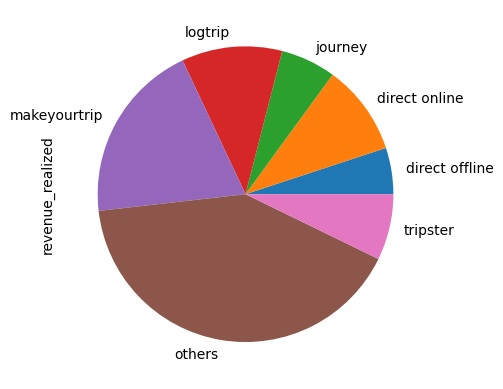

In [88]:
df_merged.groupby("booking_platform")["revenue_realized"].sum().plot(kind="pie")

In [91]:
df_merged.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,date,mmm yy,week no,day_type,room_id,room_class,property_name,category,city
0,May012216558RT21,16558,2022-07-04,1/5/2022,6/5/2022,2.0,others,3.619045,Checked Out,12600,12600,2022-07-04,Jul 22,W 28,weekeday,RT2,Elite,Atliq Grands,Luxury,Delhi
1,May012216559RT320,16559,2022-07-04,1/5/2022,2/5/2022,3.0,others,3.619045,Cancelled,22440,8976,2022-07-04,Jul 22,W 28,weekeday,RT3,Premium,Atliq Exotica,Luxury,Mumbai
2,May012216560RT22,16560,2022-07-04,1/5/2022,2/5/2022,2.0,others,3.000000,Checked Out,12600,12600,2022-07-04,Jul 22,W 28,weekeday,RT2,Elite,Atliq City,Business,Delhi


In [92]:
booking_trends = df_merged.groupby('week no')['booking_id'].count().reset_index()
booking_trends.columns = ['check_in_date', 'booking_count']

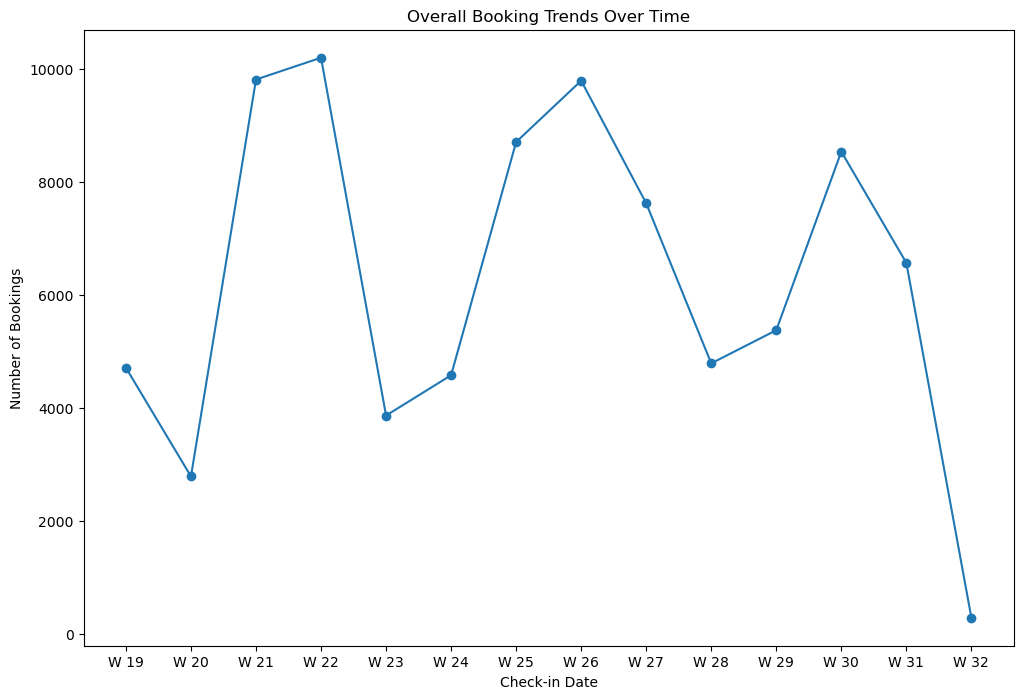

In [93]:
plt.figure(figsize=(12, 8))
plt.plot(booking_trends['check_in_date'], booking_trends['booking_count'], marker='o')
plt.title('Overall Booking Trends Over Time')
plt.xlabel('Check-in Date')
plt.ylabel('Number of Bookings')
plt.show()

**Explore Revenue by Property and Room Category:**

In [99]:
property_revenue = df_merged.groupby('property_name')['revenue_generated'].sum().reset_index()
room_category_revenue = df_merged.groupby('room_class')['revenue_generated'].sum().reset_index()

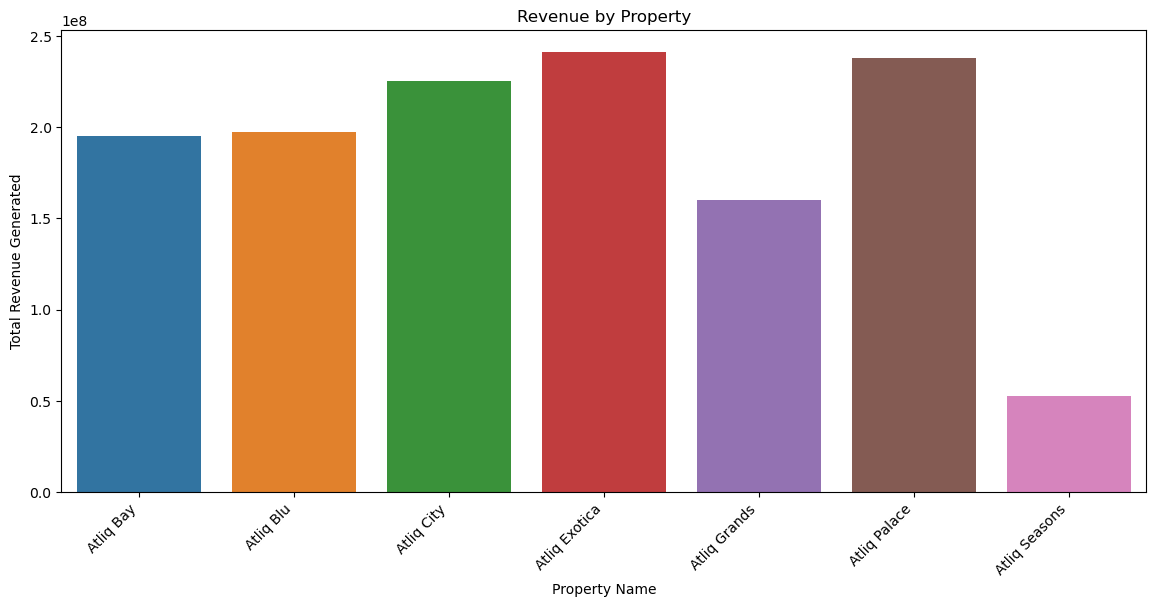

In [96]:
plt.figure(figsize=(14, 6))
sns.barplot(x='property_name', y='revenue_generated', data=property_revenue)
plt.title('Revenue by Property')
plt.xlabel('Property Name')
plt.ylabel('Total Revenue Generated')
plt.xticks(rotation=45, ha='right')
plt.show()

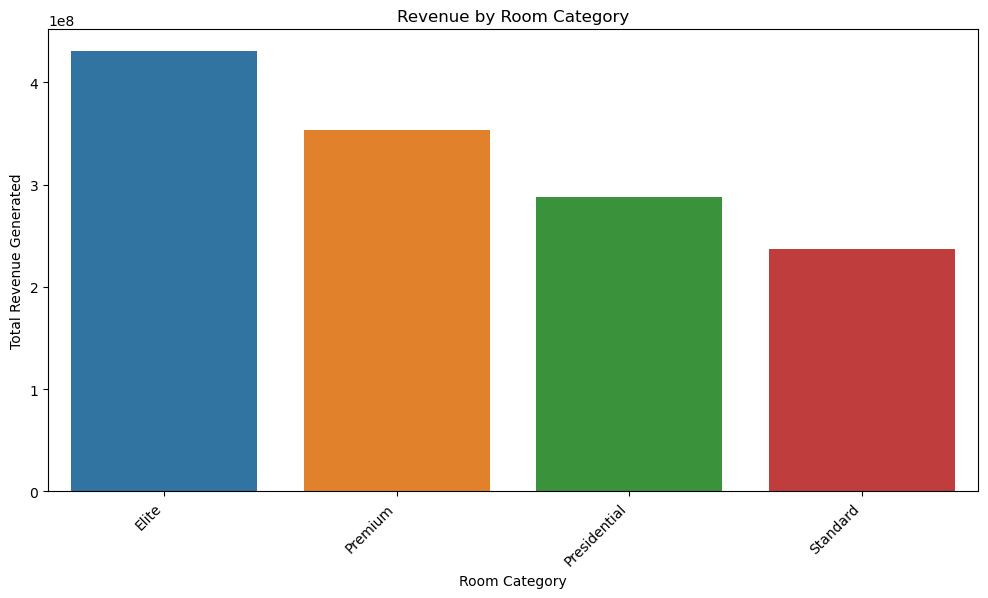

In [100]:
plt.figure(figsize=(12, 6))
sns.barplot(x='room_class', y='revenue_generated', data=room_category_revenue)
plt.title('Revenue by Room Category')
plt.xlabel('Room Category')
plt.ylabel('Total Revenue Generated')
plt.xticks(rotation=45, ha='right')
plt.show()

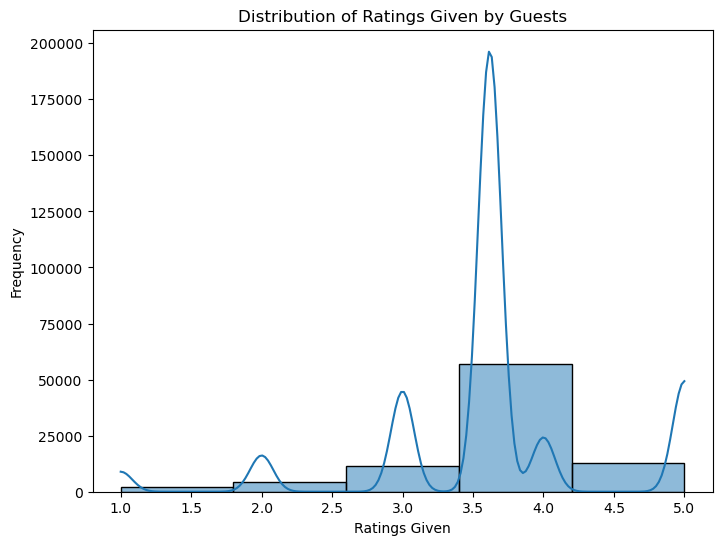

In [103]:
plt.figure(figsize=(8, 6))
sns.histplot(df_merged['ratings_given'], bins=5, kde=True)
plt.title('Distribution of Ratings Given by Guests')
plt.xlabel('Ratings Given')
plt.ylabel('Frequency')
plt.show()

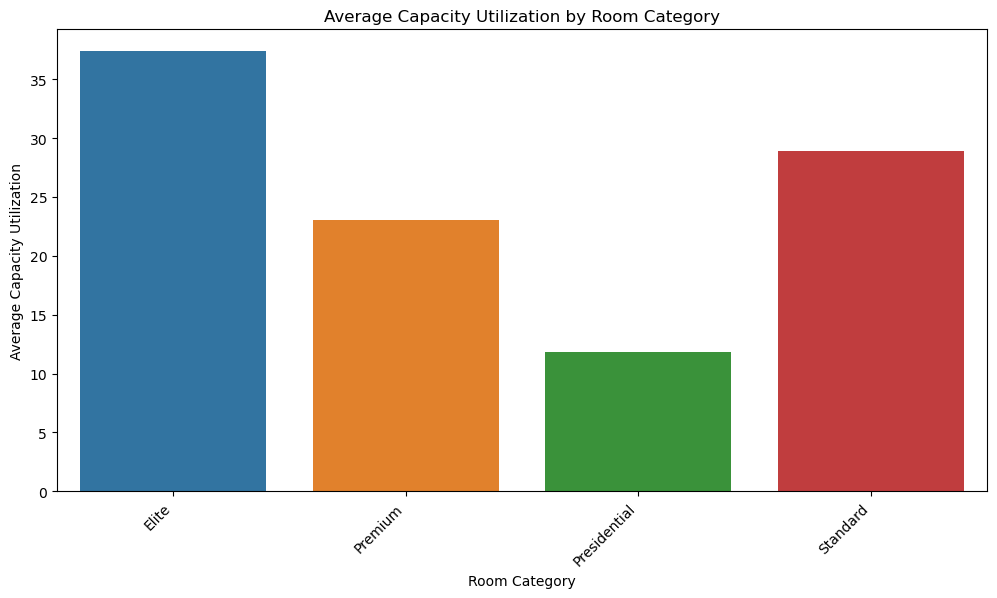

In [115]:
room_category_capacity = df_agg_bookings_merged.groupby('room_class')['capacity'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='room_class', y='capacity', data=room_category_capacity)
plt.title('Average Capacity Utilization by Room Category')
plt.xlabel('Room Category')
plt.ylabel('Average Capacity Utilization')
plt.xticks(rotation=45, ha='right')
plt.show()

In [118]:
df_agg_bookings_merged.head()

,property_id,check_in_date,successful_bookings,capacity,occ_pct,property_name,category,city,room_id,room_class,date,mmm yy,week no,day_type
0,16559,2022-05-01,25,30.0,83.33,Atliq Exotica,Luxury,Mumbai,RT1,Standard,2022-05-01,May 22,W 19,weekend
1,16559,2022-05-01,35,41.0,85.37,Atliq Exotica,Luxury,Mumbai,RT2,Elite,2022-05-01,May 22,W 19,weekend
2,16559,2022-05-01,27,32.0,84.38,Atliq Exotica,Luxury,Mumbai,RT3,Premium,2022-05-01,May 22,W 19,weekend
3,16559,2022-05-01,17,18.0,94.44,Atliq Exotica,Luxury,Mumbai,RT4,Presidential,2022-05-01,May 22,W 19,weekend
4,16559,2022-05-02,20,30.0,66.67,Atliq Exotica,Luxury,Mumbai,RT1,Standard,2022-05-02,May 22,W 19,weekeday


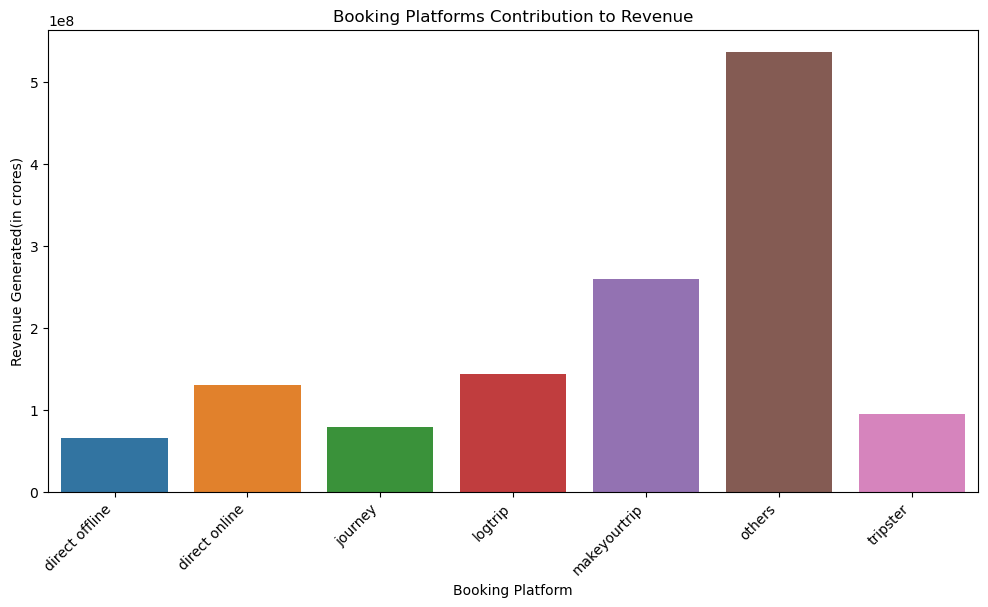

In [124]:
# Booking Platforms Contribution to Revenue
booking_platform_revenue = df_merged.groupby('booking_platform')['revenue_generated'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='booking_platform', y='revenue_generated', data=booking_platform_revenue)
plt.title('Booking Platforms Contribution to Revenue')
plt.xlabel('Booking Platform')
plt.ylabel('Revenue Generated(in crores)')
plt.xticks(rotation=45, ha='right')
plt.show()

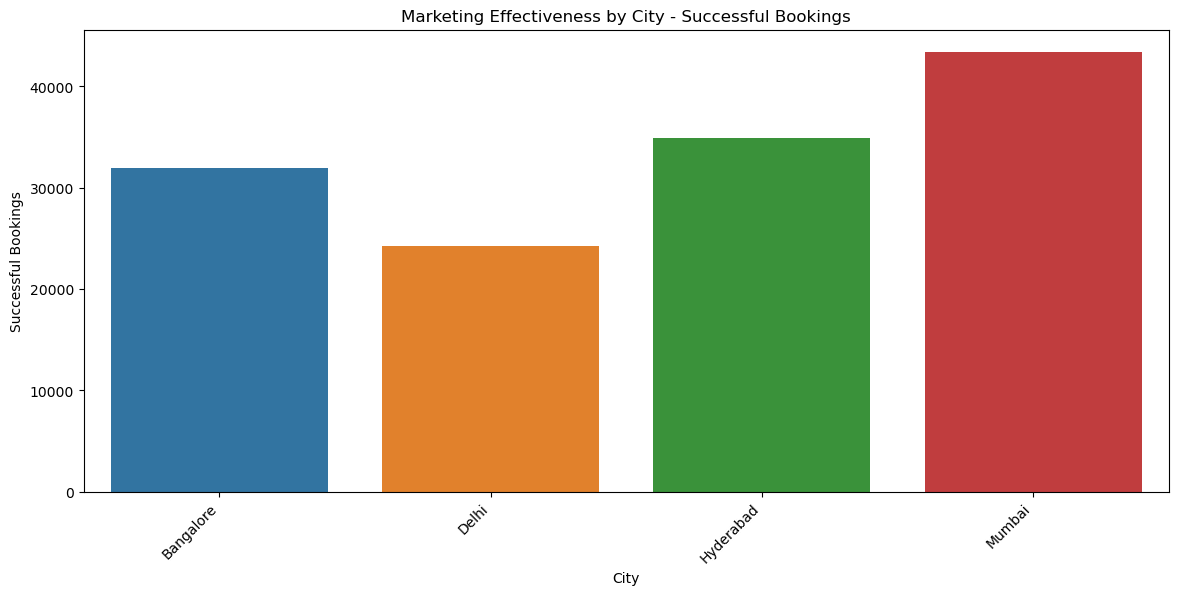

In [125]:
# Marketing Effectiveness by City - Successful Bookings
city_success = df_agg_bookings_merged.groupby('city')['successful_bookings'].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(x='city', y='successful_bookings', data=city_success)
plt.title('Marketing Effectiveness by City - Successful Bookings')
plt.xlabel('City')
plt.ylabel('Successful Bookings')
plt.xticks(rotation=45, ha='right')
plt.show()

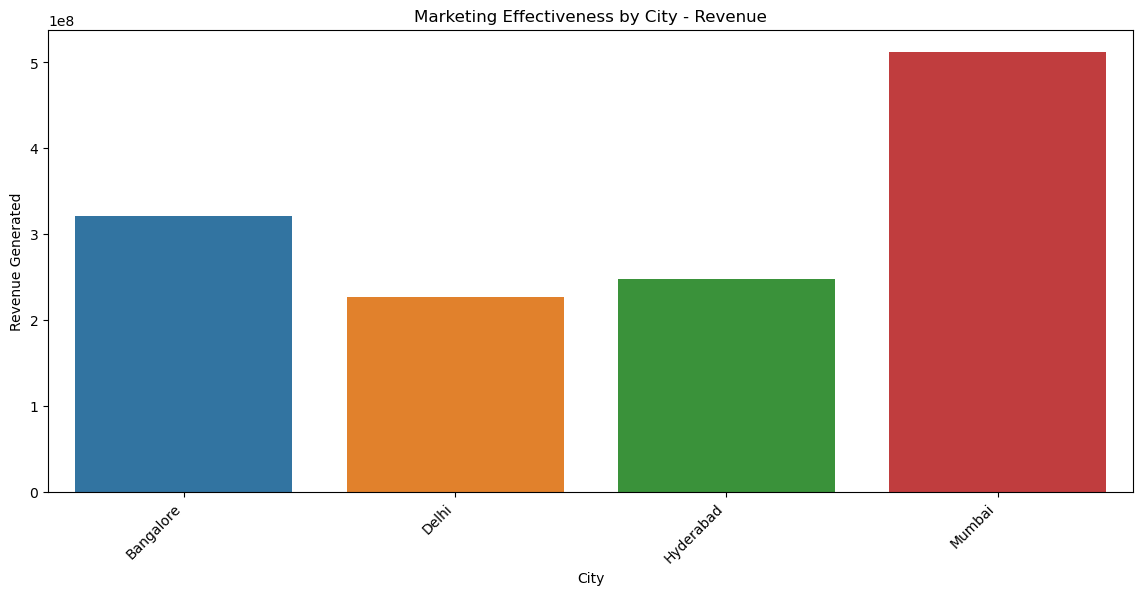

In [126]:
# Marketing Effectiveness by City - Revenue
city_revenue = df_merged.groupby('city')['revenue_generated'].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(x='city', y='revenue_generated', data=city_revenue)
plt.title('Marketing Effectiveness by City - Revenue')
plt.xlabel('City')
plt.ylabel('Revenue Generated')
plt.xticks(rotation=45, ha='right')
plt.show()

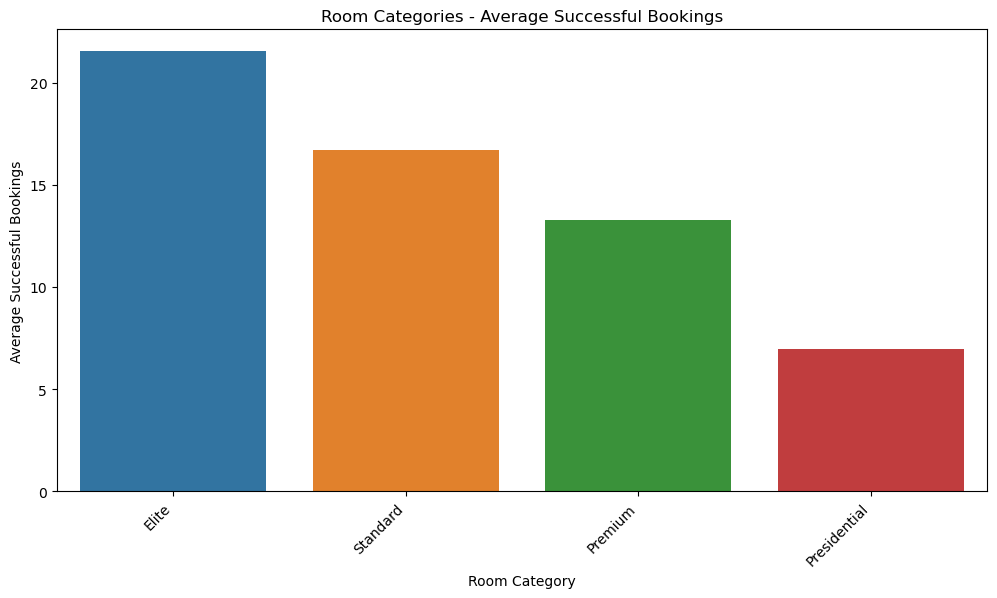

In [127]:
room_categories = df_agg_bookings_merged.groupby('room_class')['successful_bookings'].mean().nlargest(5).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='room_class', y='successful_bookings', data=room_categories)
plt.title('Room Categories - Average Successful Bookings')
plt.xlabel('Room Category')
plt.ylabel('Average Successful Bookings')
plt.xticks(rotation=45, ha='right')
plt.show()

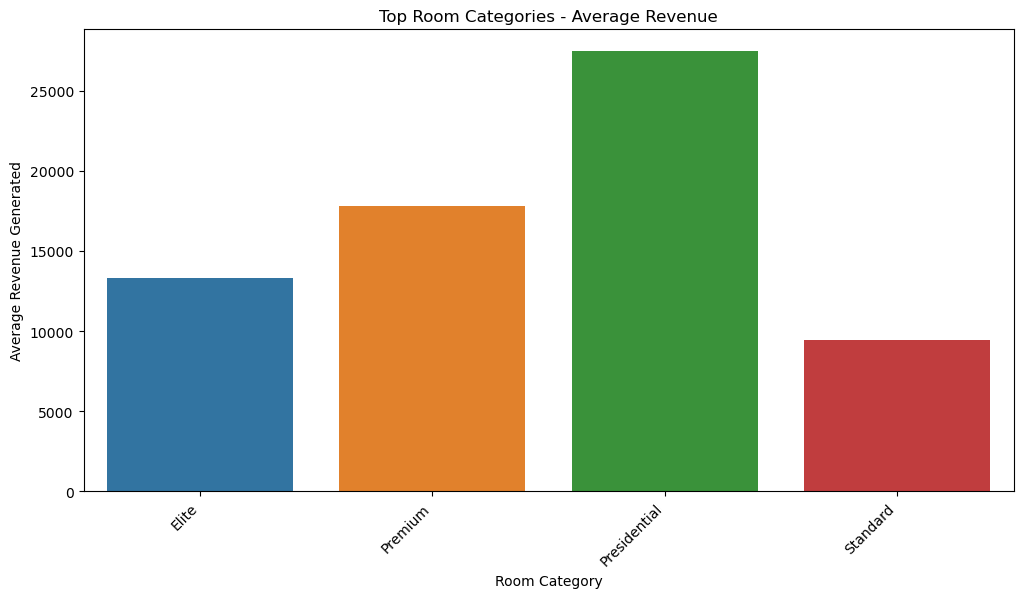

In [129]:
# Room Categories with the Highest Average Revenue
room_categories_revenue = df_merged.groupby('room_class')['revenue_generated'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='room_class', y='revenue_generated', data=room_categories_revenue)
plt.title('Top Room Categories - Average Revenue')
plt.xlabel('Room Category')
plt.ylabel('Average Revenue Generated')
plt.xticks(rotation=45, ha='right')
plt.show()